<a href="https://colab.research.google.com/github/alvinalzali/Praktikum/blob/main/PC_GLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#menginstal opencv terbaru untuk memastikan
!pip install opencv-python

#Mencari Gitur GLCM Citra

Codingan dibawah adalah code mencari GLCM yang bersumber dari :
1. https://yunusmuhammad007.medium.com/feature-extraction-gray-level-co-occurrence-matrix-glcm-10c45b6d46a1

Cara kerja code ini adalah dengan meload dataset berupa gambar dari path yang telah ditentukan namanya.


In [1]:
#Copy dataset gambar dari github
!git clone -l -s git://github.com/alvinalzali/Praktikum.git 

Cloning into 'Praktikum'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 992.07 KiB | 12.56 MiB/s, done.
Resolving deltas: 100% (3/3), done.


##Membaca dataset gambar

In [13]:
import numpy as np 
from google.colab.patches import cv2_imshow
import os
import re

# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
        

# -------------------- Load Dataset ------------------------
 
dataset_dir = "/content/Praktikum/Dataset PC" 

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]
            
            resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
            imgs.append(resize)
            labels.append(normalize_label(os.path.splitext(filename)[0]))
            descs.append(normalize_desc(folder, sub_folder))
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)


[##########] folder : 1. Mangga/1.1 Mangga Gedong Gincu/ ----> file : MGG(1).jpg
[##########] folder : 1. Mangga/1.2 Mangga Arumanis/ ----> file : MA(2).jpg
[##########] folder : 2. Jeruk/2.1 Jeruk Nipis/ ----> file : JN(2).jpg


##Menampilkan gambar yang telah dimasukan ke variabel ber-array

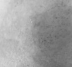

In [31]:
cv2_imshow(imgs[1])

cv2.waitKey(0)
cv2.destroyAllWindows()

##Menghitung GLCM dari sudut 0, 45, 90, dan 135 derajat

In [24]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

##Mengekspor hasil ke dalam file csv dan menampilkannya

In [28]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("glcm_coffee_dataset.csv")

glcm_df.head(7)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,10.675537,10.699707,11.231092,12.942139,0.761434,0.762074,0.799657,0.699648,0.129966,0.123290,0.101369,0.090940,360.207750,312.922852,265.365079,399.478271,0.000642,0.000670,0.000620,0.000598,0.025341,0.025886,0.024895,0.024453,MGG2
1,8.136333,8.465219,6.208109,7.209384,0.945135,0.943939,0.969751,0.957431,0.125618,0.111915,0.155014,0.136478,114.748051,118.257470,65.268593,89.224790,0.000544,0.000539,0.000624,0.000577,0.023317,0.023212,0.024975,0.024015,MGG1
2,8.562153,8.542526,8.254905,8.989875,0.892085,0.893699,0.903879,0.877842,0.116787,0.117215,0.123846,0.111910,130.715972,128.363586,123.230243,147.101068,0.000436,0.000448,0.000446,0.000438,0.020891,0.021157,0.021121,0.020939,MA1
3,4.598162,7.382033,9.578030,9.086207,0.965788,0.889986,0.831190,0.855964,0.203628,0.145352,0.095333,0.100363,35.760234,97.347550,145.458588,127.096189,0.001099,0.000897,0.000780,0.000811,0.033147,0.029958,0.027924,0.028485,MA2
4,11.295900,16.076847,15.992674,13.313300,0.846872,0.692668,0.685722,0.771398,0.119646,0.073071,0.064109,0.078505,269.613191,475.560591,458.093407,335.459113,0.000893,0.000759,0.000747,0.000840,0.029887,0.027551,0.027327,0.028985,JN1
5,6.738839,6.354651,6.418440,7.583056,0.781788,0.775252,0.790808,0.724519,0.144415,0.166016,0.155935,0.134750,82.759673,81.246678,81.269504,102.388704,0.001229,0.001413,0.001387,0.001247,0.035061,0.037592,0.037246,0.035311,JN2
6,17.707912,25.640625,25.285229,21.959559,0.904011,0.802908,0.796040,0.848948,0.069607,0.034150,0.031478,0.045772,539.992424,969.528493,943.582343,738.284926,0.000512,0.000523,0.000488,0.000539,0.022634,0.022867,0.022096,0.023207,JC2
